In [4]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

Parameters: tensor([0.7552], requires_grad=True), tensor([0.7756], requires_grad=True)


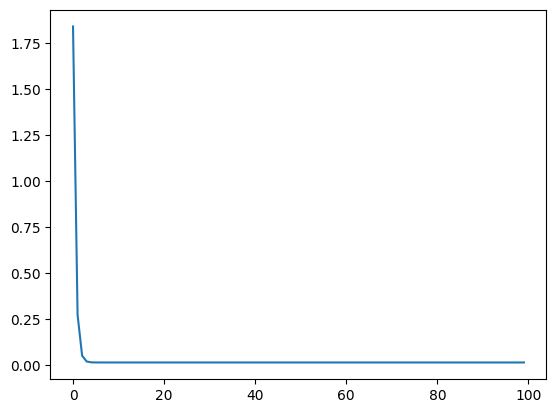

In [19]:
x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])

b = torch.rand([1], requires_grad=True)
w = torch.rand([1], requires_grad=True)
print("Parameters: {}, {}".format(w,b))

lr = torch.tensor(0.001)

loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j])**2
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    w.grad.zero_()
    b.grad.zero_()
    # print("w={}, b={}, loss={}".format(w, b, loss.item()))

plt.plot(loss_list)
plt.show()

2

w=0.996999979019165, b=0.9990000128746033, loss=-26.0
w=0.9939999580383301, b=0.9980000257492065, loss=-26.010000228881836
Analytical Solution
Epoch = 0, w=1.21, b=1.07, loss=-26.0
Epoch = 1, w=1.41454, b=1.13818, loss=-38.3


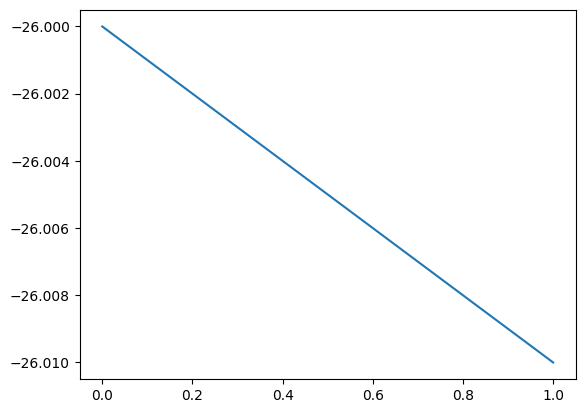

In [31]:
inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1., requires_grad = True)
w = torch.tensor(1., requires_grad = True)
lr = torch.tensor(0.001)
loss_list = []

for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j])
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    w.grad.zero_()
    b.grad.zero_()
    # if epochs % 10 == 0:
    print("w={}, b={}, loss={}".format(w, b, loss.item()))

def analytical(x, y, w, b):
    loss = 0.0
    loss_list = []
    for epochs in range(2):
        for j in range(len(x)):
            y_p = w * x[j] + b
            loss += (y_p - y[j])
        loss = loss / len(x)
        loss_list.append(loss.item())
        wgrad, bgrad = 0, 0
        for i in range(len(x)):
            wgrad += (y_p - y[j]) * x[i]
            bgrad += (y_p - y[j])
        w -= 0.001 * wgrad * 2/ len(x)
        b -= 0.001 * bgrad * 2/len(x)
        print("Epoch = {}, w={}, b={}, loss={}".format(epochs,w, b, loss))


print("Analytical Solution")
analytical(inp_x, inp_y, 1, 1)


plt.plot(loss_list)
plt.show()

3

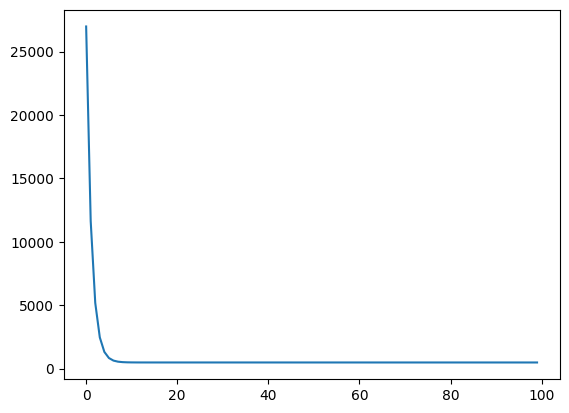

In [34]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)
    def forward(self, x):
        return self.w * x + self.b
    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    
def criterion(yj, y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []
for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)
        # loss += torch.norm(y[j] - y_p)
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        model.update()
    model.reset_grad()
    # print("Parameters w={}, b={}, loss={}".format(model.w, model.b, loss.item()))

plt.plot(loss_list)
plt.show()

4

In [38]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x, y)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

for data in iter(data_loader):
    print(data)

learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1], requires_grad=True))
        self.b = torch.nn.Parameter(torch.rand([1], requires_grad=True))
    def forward(self,x):
        return self.w * x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

for epochs in range(100):
    loss = 0.0
    for i, data in enumerate(data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()
    finalLoss = loss / len(data_loader)*4
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
print(finalLoss)

[tensor([16.,  7., 12., 20.]), tensor([210., 120., 180., 240.])]
[tensor([5.]), tensor([40.])]
tensor(4859.5210, grad_fn=<MulBackward0>)


After 0 epochs, loss =299.92401123046875
After 10 epochs, loss =1.1053203934352496e-06
After 20 epochs, loss =8.304082248222766e-13
After 30 epochs, loss =2.7680272353738933e-13
After 40 epochs, loss =2.372594850620635e-13
After 50 epochs, loss =1.9771623303421054e-13
After 60 epochs, loss =1.9771623303421054e-13
After 70 epochs, loss =1.9771623303421054e-13
After 80 epochs, loss =1.9771623303421054e-13
After 90 epochs, loss =1.9771623303421054e-13


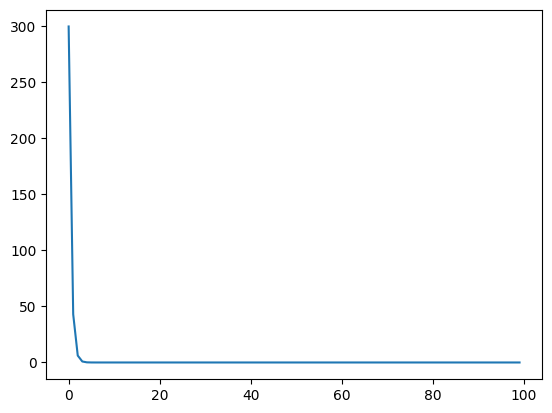

In [40]:
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23,23)
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_list = []
for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10==0:
        print("After {} epochs, loss ={}".format(epochs,loss.item()))

plt.plot(loss_list)

In [41]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

[tensor([4, 5]), tensor([5, 7]), tensor([3.5000, 2.5000])]
[tensor([6, 2]), tensor([3, 1]), tensor([11.5000,  5.7000])]
[tensor([3]), tensor([8]), tensor([-3.5000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.8307], requires_grad=True),b=Parameter containing:
tensor([0.3018], requires_grad=True), and loss =Parameter containing:
tensor([0.9144], requires_grad=True)
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.9605], requires_grad=True),b=Parameter containing:
tensor([-0.2978], requires_grad=True), and loss =Parameter containing:
tensor([0.9127], requires_grad=True)
After 20 epochs, The parameters are w=Parameter containing:
tensor([1.2724], requires_grad=True),b=Parameter containing:
tensor([-0.5156], requires_grad=True), and loss =Parameter containing:
tensor([0.9641], requires_grad=True)
After 30 epochs, The parameters are w=Parameter containing:
tensor([1.4817], requires_grad=True),b=Parameter containing:
tensor([-0.7185], requires_g

In [42]:
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

After 0 epochs, The parameters are w=Parameter containing:
tensor([0.7726], requires_grad=True),b=Parameter containing:
tensor([0.5541], requires_grad=True), and loss =0.0
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.3918], requires_grad=True),b=Parameter containing:
tensor([0.5118], requires_grad=True), and loss =0.0
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.0361], requires_grad=True),b=Parameter containing:
tensor([0.4725], requires_grad=True), and loss =0.041014164686203
After 30 epochs, The parameters are w=Parameter containing:
tensor([0.0365], requires_grad=True),b=Parameter containing:
tensor([0.4450], requires_grad=True), and loss =0.04048128053545952
After 40 epochs, The parameters are w=Parameter containing:
tensor([0.0369], requires_grad=True),b=Parameter containing:
tensor([0.4178], requires_grad=True), and loss =0.03985088691115379
After 50 epochs, The parameters are w=Parameter containing:
tensor([0.0373], requires_grad